<a href="https://colab.research.google.com/github/delacruzsebastian-cpu/Actividades-y-proyectos-de-machine-learning/blob/main/PROYECTOIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from scipy.spatial import distance
from sklearn import svm
# Implementación de Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Escalizar datos 
# Métricas a implementar
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
features = ['battery_power', 'fc', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'px_width', 'sc_h', 'sc_w', 'talk_time','blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi']
label = ['price_range']
X=data[features]
y=data[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train=X_train_scaled
X_test=X_test_scaled

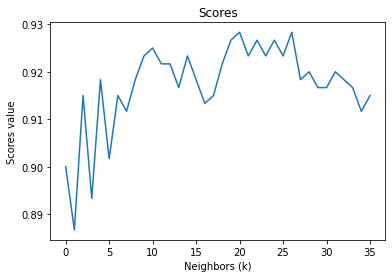

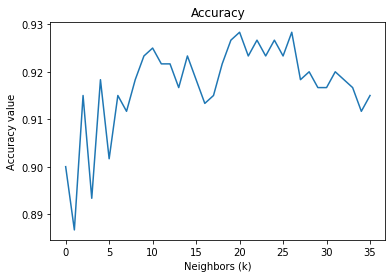

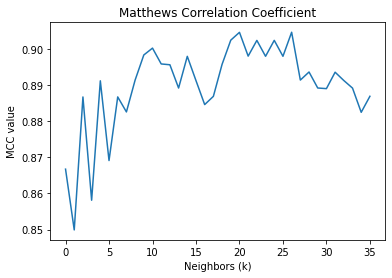

Best k by Scores: 21 . Value: 0.9283333333333333
Best k by Accuracy: 21 . Value: 0.9283333333333333
Best k by MCC: 27 . Value: 0.9045530639152422


In [ ]:
k_range = range(1, int(np.sqrt(len(y_train))))

#Distances: euclidean. manhattan. chebyshev. minkowski. seuclidean. mahalanobis. hamming
distance='euclidean'

scores = []
acc = []
MCC = []
F1 = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', metric=distance, metric_params=None, algorithm='brute')
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  y_test_predict = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_test_predict))
  MCC.append(matthews_corrcoef(y_test, y_test_predict))

plt.plot(scores)
plt.title("Scores")
plt.xlabel("Neighbors (k)")
plt.ylabel("Scores value")
plt.show()
plt.plot(acc)
plt.title("Accuracy")
plt.xlabel("Neighbors (k)")
plt.ylabel("Accuracy value")
plt.show()
plt.plot(MCC)
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Neighbors (k)")
plt.ylabel("MCC value")
plt.show()

print("Best k by Scores:",k_range[np.argmax(scores)],". Value:",scores[np.argmax(scores)])
print("Best k by Accuracy:",k_range[np.argmax(acc)],". Value:",acc[np.argmax(acc)])
print("Best k by MCC:",k_range[np.argmax(MCC)],". Value:",MCC[np.argmax(MCC)])

In [ ]:
n_neighbors = 36

knn = KNeighborsClassifier(n_neighbors, weights='uniform', metric=distance, metric_params=None, algorithm='auto')
knn = knn.fit(X_train, y_train)

y_predict=knn.predict(X_train)
print('Train subset')
print('Accuracy of K-NN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of K-NN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_knn=knn.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of K-NN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_knn)))
print('MCC of K-NN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_knn)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of K-NN classifier on training set: 0.92857
MCC of K-NN classifier on training set: 0.90485

Test subset
Accuracy of K-NN classifier on test set: 0.91500
MCC of K-NN classifier on test set: 0.88685

Classification time: 0.03204 s


0.8868473148866264

In [ ]:
#Solvers: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

log_reg = LogisticRegression(C=0.1, random_state=1, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_predict=log_reg.predict(X_train)
print('Train subset')
print('Accuracy of LR classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of LR classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_LR=log_reg.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of LR classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_LR)))
print('MCC of LR classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_LR)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of LR classifier on training set: 0.70929
MCC of LR classifier on training set: 0.61244

Test subset
Accuracy of LR classifier on test set: 0.71333
MCC of LR classifier on test set: 0.61811

Classification time: 0.00115 s


In [ ]:
Pred = Log_Reg.predict(X_test)
pred_probs = Log_Reg.predict_proba(X_test)
# Matriz de confusion
print(confusion_matrix(y_test, pred))
# Reporte 
print(classification_report(y_test, pred))
# Implementación Matthews
print('Implementación con Matthews: ',matthews_corrcoef(y_test, pred))

[[158   5   0   0]
 [  6 136   4   0]
 [  0  15 121   9]
 [  0   0  12 134]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       163
           1       0.87      0.93      0.90       146
           2       0.88      0.83      0.86       145
           3       0.94      0.92      0.93       146

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.91       600

Implementación con Matthews:  0.8868473148866264
